Problem 12:

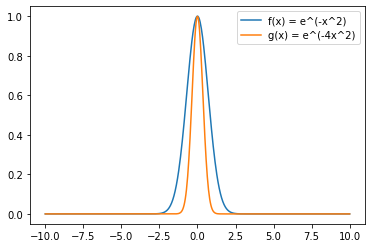

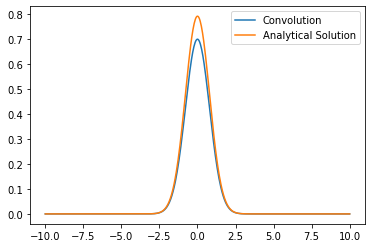

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f(x) and g(x)
def f(x):
    return np.exp(-x**2)

def g(x):
    return np.exp(-4*x**2)
# Analytic solution is obtained using Mathematica
def analytical_solution(y):
    return np.sqrt(np.pi/5) * np.exp(-(4*y**2)/5)

# Sampling
x_min = -10.0 # the effective range of function necessary
x_max = 10.0
n = 512 # number of points(will be doubled while zero padding)
x = np.linspace(x_min,x_max,n)
d = (x_max-x_min)/n 

f_val=f(x)
g_val=g(x)
f_pad=np.pad(f_val,(0,len(x)),mode='constant',constant_values=(0,0))
g_pad=np.pad(g_val,(0,len(x)),mode='constant',constant_values=(0,0))


f_dft = np.fft.fft(f_pad,norm='ortho')
g_dft = np.fft.fft(g_pad,norm='ortho')

product=f_dft*g_dft

idft=(np.fft.ifft(product,norm='ortho'))

convolve=(d/2)*np.sqrt(2*(n-1))*np.sqrt(np.pi)*(idft)

analytical_vals = analytical_solution(x)

plt.plot(x,f_val,label='f(x) = e^(-x^2)')
plt.plot(x,g_val,label='g(x) = e^(-4x^2)')
plt.legend()
plt.show()

plt.plot(np.linspace(x_min,x_max,n-1),convolve[(n-1)-n//2+1:(n-1)+n//2].real,label='Convolution')
plt.plot(x, analytical_vals, label='Analytical Solution')
plt.legend()